## As of 5/26/2022, only R4 has been updated to include weighted area-averages (by latitude) for all 3 epochs.

# Load in the MAMJ anomalies of the data: 

In [1]:
import glob as glob
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

##########################################################################################################################################
##########################################################################################################################################

#### CONUS ####
# lat_CONUS = slice(14,60)     ## This is in degrees north for CONUS
# lon_CONUS = slice(230,295)   ## This is in degrees east for CONUS
# loc_CONUS ='CONUS'

#### SE US ####
lat_r1 = slice(30,37)
lon_r1 = slice(266,284)
loc_r1 = 'SE US' 

#### TXOK ####
lat_r2 = slice(30,37)
lon_r2 = slice(257,266)
loc_r2 = 'TX/OK'

#### Midwest ####
lat_r3 = slice(37,44)
lon_r3 = slice(257,270.7)
loc_r3 = 'Midwest'

#### Large SE US Domain ####
lat_r4 = slice(25,43)
lon_r4 = slice(256,291)
loc_r4 = 'Large SE US Domain'

##########################################################################################################################################
##########################################################################################################################################
point = '(2020 - 2049)'
#########################################################
variable1 = 'mcape'
var1 = 'CAPE'
name1 = 'cape.'    ### Dimensions: (realization, time, lat, lon)
cesm_title1 = 'S06'
units1 = 'J/kg'

variable2 = 'S06'
var2 = 'S06'
name2 = 's06'    ### Dimensions: (realization, time, lat, lon)
cesm_title2 = 'S06'
units2 = 'm/s'

variable3 = 'capes06'
var3 = 'CAPES06'
name3 = 'capes06'    ### Dimensions: (realization, time, lat, lon)
cesm_title3 = 'CAPES06'
units3 = 'm$^{3}$/s$^{3}$'

variable4 = 'mcin'
var4 = 'CIN'
name4 = 'cin'    ### Dimensions: (realization, time, lat, lon)
cesm_title4 = 'CIN'
units4 = 'J/kg'


In [2]:
mask = xr.open_dataset('p_cal_cesm2_mask.nc')

In [3]:
#################################################### VARIABLE 1 ########################################################
h_files1 = sorted(glob.glob(name1 + '*1870-2014.nc'))
f_files1 = sorted(glob.glob(name1 + '*2015-2100.nc'))
hist1 = xr.open_mfdataset(h_files1, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
fut1 = xr.open_mfdataset(f_files1, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
total1 = xr.concat([hist1,fut1], dim = 'time')[variable1]
mamj1 = total1.groupby('time.year').mean('time')

# r1_1 = mamj1.sel(lat = lat_r1, lon = lon_r1)#.mean(dim=('lat','lon'))
# r2_1 = mamj1.sel(lat = lat_r2, lon = lon_r2)#.mean(dim=('lat','lon'))
# r3_1 = mamj1.sel(lat = lat_r3, lon = lon_r3)#.mean(dim=('lat','lon'))
r4_1 = mamj1.sel(lat = lat_r4, lon = lon_r4)#.mean(dim=('lat','lon'))

#################################################### VARIABLE 2 ########################################################
h_files2 = sorted(glob.glob(name2 + '*1870-2014.nc'))
f_files2 = sorted(glob.glob(name2 + '*2015-2100.nc'))
hist2 = xr.open_mfdataset(h_files2, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
fut2 = xr.open_mfdataset(f_files2, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
total2 = xr.concat([hist2,fut2], dim = 'time')[variable2]
mamj2 = total2.groupby('time.year').mean('time')

# r1_2 = mamj2.sel(lat = lat_r1, lon = lon_r1)#.mean(dim=('lat','lon'))
# r2_2 = mamj2.sel(lat = lat_r2, lon = lon_r2)#.mean(dim=('lat','lon'))
# r3_2 = mamj2.sel(lat = lat_r3, lon = lon_r3)#.mean(dim=('lat','lon'))
r4_2 = mamj2.sel(lat = lat_r4, lon = lon_r4)#.mean(dim=('lat','lon'))

#################################################### VARIABLE 3 ########################################################
h_files3 = sorted(glob.glob(name3 + '*1870-2014.nc'))
f_files3 = sorted(glob.glob(name3 + '*2015-2100.nc'))
hist3 = xr.open_mfdataset(h_files3, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
fut3 = xr.open_mfdataset(f_files3, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
total3 = xr.concat([hist3,fut3], dim = 'time')[variable3]
mamj3 = total3.groupby('time.year').mean('time')

# r1_3 = mamj3.sel(lat = lat_r1, lon = lon_r1)#.mean(dim=('lat','lon'))
# r2_3 = mamj3.sel(lat = lat_r2, lon = lon_r2)#.mean(dim=('lat','lon'))
# r3_3 = mamj3.sel(lat = lat_r3, lon = lon_r3)#.mean(dim=('lat','lon'))
r4_3 = mamj3.sel(lat = lat_r4, lon = lon_r4)#.mean(dim=('lat','lon'))

#################################################### VARIABLE 4 ########################################################
h_files4 = sorted(glob.glob(name4 + '*1870-2014.nc'))
f_files4 = sorted(glob.glob(name4 + '*2015-2100.nc'))
hist4 = xr.open_mfdataset(h_files4, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
fut4 = xr.open_mfdataset(f_files4, concat_dim = 'realization', combine = 'nested').where(mask.LSMASK == 1.0)
total4 = xr.concat([hist4,fut4], dim = 'time')[variable4]
mamj4 = total4.groupby('time.year').mean('time')

# r1_4 = mamj4.sel(lat = lat_r1, lon = lon_r1)*(-1)#.mean(dim=('lat','lon'))*(-1)
# r2_4 = mamj4.sel(lat = lat_r2, lon = lon_r2)*(-1)#.mean(dim=('lat','lon'))*(-1)
# r3_4 = mamj4.sel(lat = lat_r3, lon = lon_r3)*(-1)#.mean(dim=('lat','lon'))*(-1)
r4_4 = mamj4.sel(lat = lat_r4, lon = lon_r4)*(-1)#.mean(dim=('lat','lon'))*(-1)



## Now, calculate weight : 

In [4]:
#### CAPE (large se us)
weights_r4_1 = np.cos(np.deg2rad(r4_1.lat))
weights_r4_1.name = "weights"                 #### This gives the array inside a name called 'weights'

#### S06 (large se us)
weights_r4_2 = np.cos(np.deg2rad(r4_2.lat))
weights_r4_2.name = "weights"                 #### This gives the array inside a name called 'weights'

#### CAPES06 (large se us)
weights_r4_3 = np.cos(np.deg2rad(r4_3.lat))
weights_r4_3.name = "weights"                 #### This gives the array inside a name called 'weights'

#### CIN (large se us)
weights_r4_4 = np.cos(np.deg2rad(r4_4.lat))
weights_r4_4.name = "weights"                 #### This gives the array inside a name called 'weights'


## Apply weights to latitudes before computing the spatial mean: 

In [5]:
r4_1_weighted = r4_1.weighted(weights_r4_1)
r4_2_weighted = r4_2.weighted(weights_r4_2)
r4_3_weighted = r4_3.weighted(weights_r4_3)
r4_4_weighted = r4_4.weighted(weights_r4_4)


In [6]:
R41_weights = r4_1_weighted.mean(("lon", "lat"))
R42_weights = r4_2_weighted.mean(("lon", "lat"))
R43_weights = r4_3_weighted.mean(("lon", "lat"))
R44_weights = r4_4_weighted.mean(("lon", "lat"))


## Now we can continue on with the analysis with weighted latitudes!:

In [7]:
### Region 4 ensemble average:
reg41 = R41_weights.mean(dim = 'realization')
reg42 = R42_weights.mean(dim = 'realization')
reg43 = R43_weights.mean(dim = 'realization')
reg44 = R44_weights.mean(dim = 'realization')


## Plotting:

/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encoun

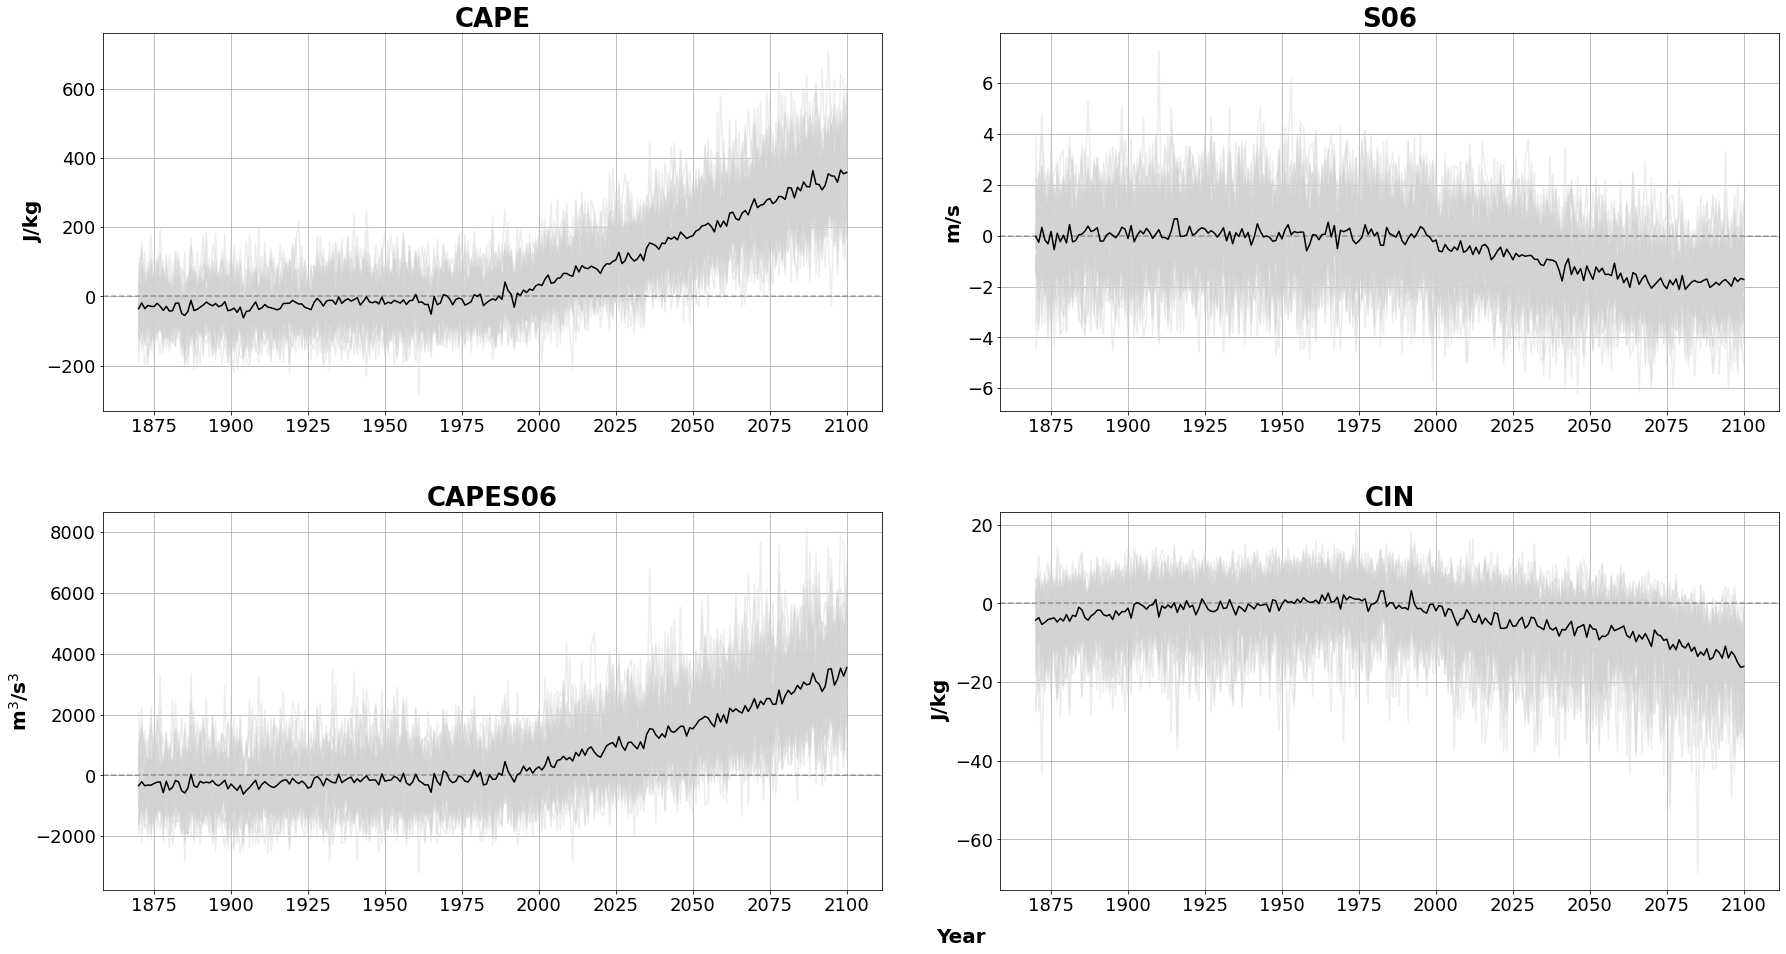

In [9]:
color = 'lightgrey' 
ft = 20 ### Font size for axis units
ls = 18  ### Font size for the axis ticks
size = 26  ### Font size for the subplot titles

fig, axs = plt.subplots(2,2,figsize=(26,14))  ###(wXh)

[[axis1, axis2],[axis3, axis4]] = axs
for i in range(len(R41_weights)):
    axis1.plot(R41_weights.year.values, R41_weights[i,:], alpha = .4, color = color )
for i in range(len(R42_weights)):
    axis2.plot(R42_weights.year.values, R42_weights[i,:], alpha = .4, color = color )
for i in range(len(R43_weights)):
    axis3.plot(R43_weights.year.values, R43_weights[i,:], alpha = .4, color = color )
for i in range(len(R44_weights)):
    axis4.plot(R44_weights.year.values, R44_weights[i,:], alpha = .4, color = color )
    
axis1.set_title('CAPE', weight = 'bold', size = size )
axis2.set_title('S06', weight = 'bold', size = size )
axis3.set_title('CAPES06', weight = 'bold', size = size )
axis4.set_title('CIN', weight = 'bold', size = size ) 

axis1.plot(reg41.year.values, reg41, color = 'black')
axis2.plot(reg42.year.values, reg42, color = 'black')
axis3.plot(reg43.year.values, reg43, color = 'black')
axis4.plot(reg44.year.values, reg44, color = 'black')


axis1.axhline(color = 'black', alpha = .3, linestyle = '--')
axis2.axhline(color = 'black', alpha = .3, linestyle = '--')
axis3.axhline(color = 'black', alpha = .3, linestyle = '--')
axis4.axhline(color = 'black', alpha = .3, linestyle = '--')
   
axis1.set_ylabel(units1, fontsize = ft, weight = 'bold')
axis2.set_ylabel(units2, fontsize = ft, weight = 'bold')
axis3.set_ylabel(units3, fontsize = ft, weight = 'bold')
axis4.set_ylabel(units4, fontsize = ft, weight = 'bold')

axis1.tick_params(axis='both', which='major', labelsize= ls)
axis2.tick_params(axis='both', which='major', labelsize= ls)
axis3.tick_params(axis='both', which='major', labelsize= ls)
axis4.tick_params(axis='both', which='major', labelsize= ls)
fig.tight_layout(pad=5.0)
axis1.grid()
axis2.grid()
axis3.grid()
axis4.grid()

axis1.set_xticks([1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100])
axis2.set_xticks([1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100])
axis3.set_xticks([1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100])
axis4.set_xticks([1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100])

axis4.set_xlabel('Year', fontsize = ft, weight = 'bold')
axis4.xaxis.set_label_coords(-0.05, -.1)

plt.savefig('Figures/TimeSeries/LD_TS_4panel_EM_weighted_MANUSCRIPT.jpg', dpi = 500)



/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


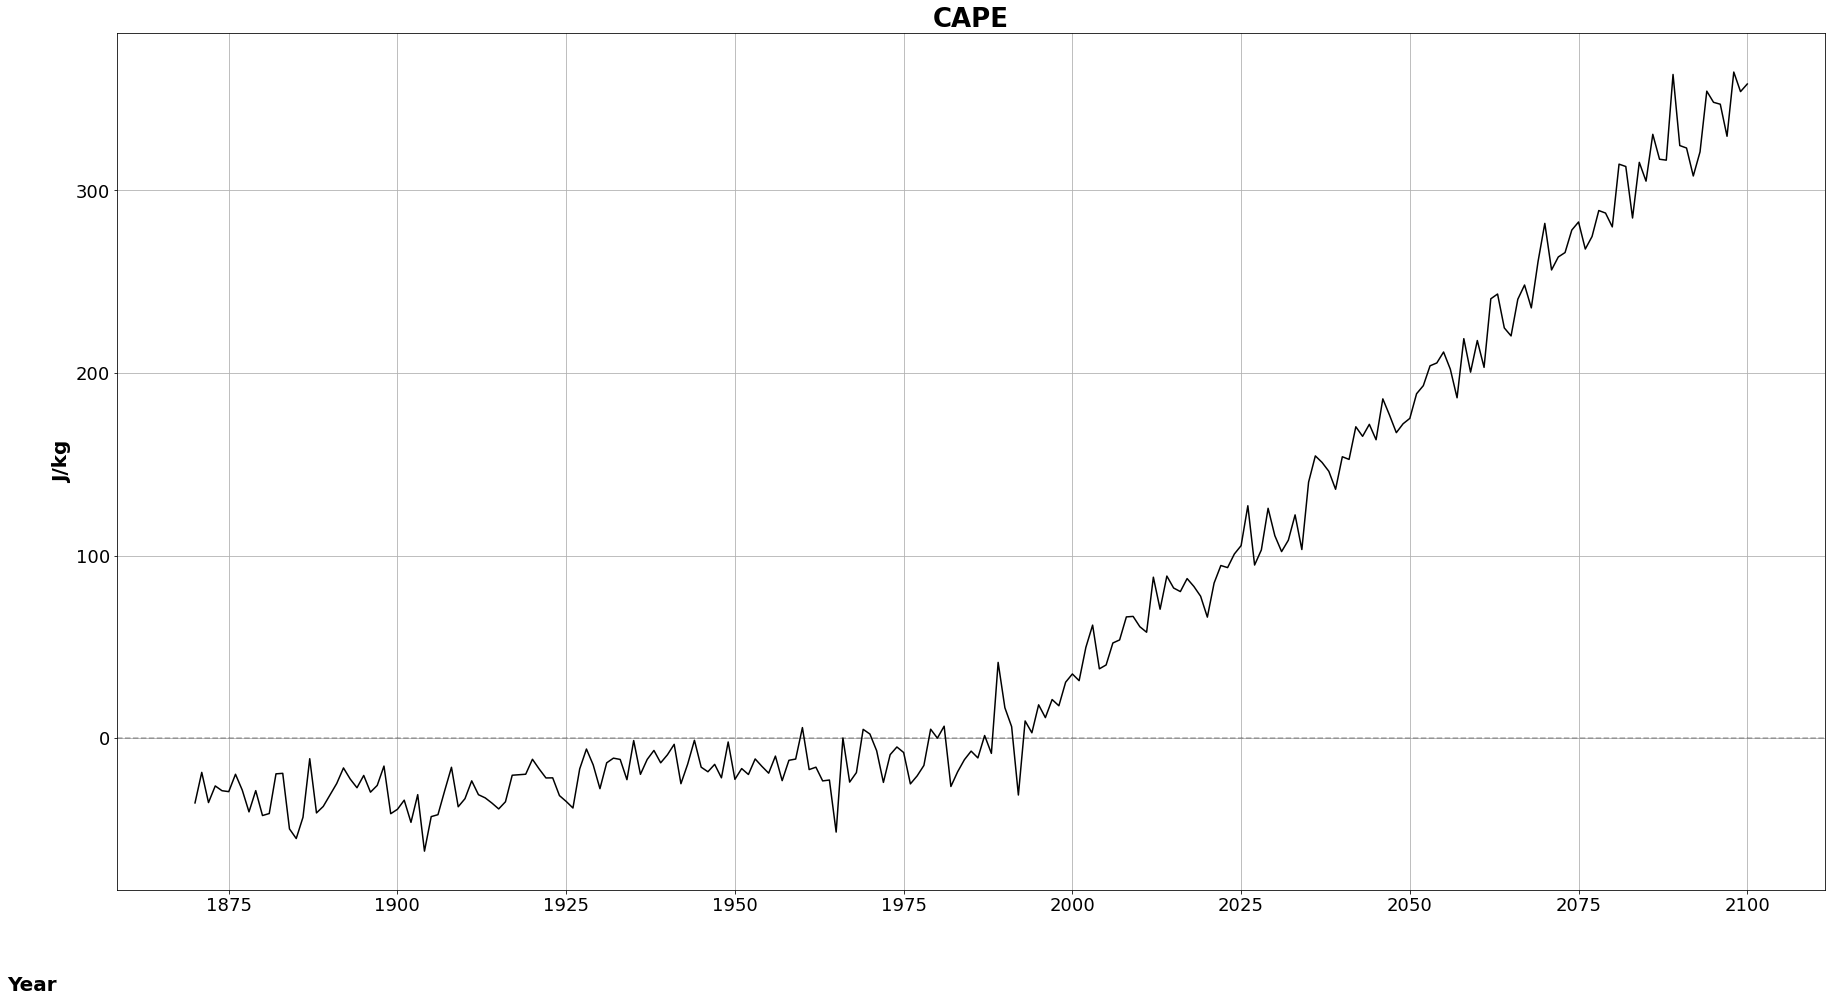

In [45]:
color = 'lightgrey' 
ft = 20 ### Font size for axis units
ls = 18  ### Font size for the axis ticks
size = 26  ### Font size for the subplot titles
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

fig, axs = plt.subplots(1,1,figsize=(26,14))  ###(wXh)
axs.set_title('CAPE', weight = 'bold', size = size )

axs.plot(reg41.year.values, reg41, color = 'black')
axs.axhline(color = 'black', alpha = .3, linestyle = '--')
   
axs.set_ylabel(units1, fontsize = ft, weight = 'bold')
axs.tick_params(axis='both', which='major', labelsize= ls)
fig.tight_layout(pad=5.0)
axs.grid()

# axs.tick_params(axis="x", which="both", length=4)
# axs.xaxis.set_ticklabels = (['1875','1900','1925','1950','1975','2000','2025','2050','2075','2100'])
axs.set_xticks([1875, 1900, 1925, 1950, 1975, 2000, 2025, 2050, 2075, 2100])

axs.set_xlabel('Year', fontsize = ft, weight = 'bold')
axs.xaxis.set_label_coords(-0.05, -.1)
# axis1.set_xticks()


# plt.savefig('Figures/TimeSeries/LD_TS_4panel_EM_weighted.jpg')



# Calculate the linear trends!

In [52]:
ensave_r41 = r4_1_weighted.mean(dim = 'realization')
ensave_r42 = r4_2_weighted.mean(dim = 'realization')
ensave_r43 = r4_3_weighted.mean(dim = 'realization')
ensave_r44 = r4_4_weighted.mean(dim = 'realization')


### Calculate the linear trends:

In [81]:
#### Region 4, variable 1 ensemble average linear trend:
x = reg41.year.values
y = reg41.values
a41 = x.reshape(-1,1)
b41 = y.reshape(-1,1)
reg_r41 = LinearRegression().fit(a41,b41)
trendline_r41 = reg_r41.predict(a41)
m_r41 = reg_r41.coef_[0]  


/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [105]:
result = reg41.polyfit(dim = "year", deg = 3)
result = result.to_array()
resultds = result.to_dataset().rename_vars({'stack-e50f8bd29ca002e739f49b340e98e106':'data_polyfit_coefficients'})
a = resultds.data_polyfit_coefficients.sel(degree=1).values


/Users/mfranke/opt/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [54]:
#######################################################################################################################
################################################ Ensemble Mean Trend: ##################################################
#### Ensemble mean for full time series:
r4_eAve = r4_1.mean(dim = 'realization')                      ######## CHANGE!!!!!!
x_r4 = r4_eAve.year.values
y_r4 = r4_eAve.values
a_r4 = x_r4.reshape(-1,1)
b_r4 = y_r4.reshape(-1,1)
reg_r4 = LinearRegression().fit(a_r4,b_r4)
trendline_r4 = reg_r4.predict(a_r4)
m_r4 = reg_r4.coef_[0]                   #### where m is slope

# #### Ensemble mean for smaller period: 
# r4p = r4_1.sel(year = slice('2021', '2050'))                        ######## CHANGE!!!!!!
# r4_eAvep = r4p.mean(dim = 'realization')
# x_r4p = r4_eAvep.year.values
# y_r4p = r4_eAvep.values
# a_r4p = x_r4p.reshape(-1,1)
# b_r4p = y_r4p.reshape(-1,1)
# reg_r4p = LinearRegression().fit(a_r4p,b_r4p)
# trendline_r4p = reg_r4p.predict(a_r4p)
# m_r4p = reg_r4p.coef_[0]                   #### where m is slope

# ####################### This loop works!!! ###########################################################
# ry = list()
# rx = list()
# a_r = list()
# b_r = list()
# reg = list()
# trend_r4 = list()
# slope_r4= list()

# r4_LT = r4_1.sel(year=slice('2021','2050'))                        ######## CHANGE!!!!!!

# for i in range(len(r4_3)):
#     ry.append(r4_LT[i,:].values)
#     rx.append(r4_LT[i,:].year.values)
#     a_r.append(rx[i].reshape(-1,1))
#     b_r.append(ry[i].reshape(-1,1))
#     reg.append(LinearRegression().fit(a_r[i], b_r[i]))
#     trend_r4.append(reg[i].predict(a_r[i]))
#     slope_r4.append(reg[i].coef_[0])

# ############################################### Find the max and min: #######################################################
# max_index_r4 = slope_r4.index(np.max(slope_r4))    
# min_index_r4 = slope_r4.index(np.min(slope_r4))     

# r4_maxTrend = trend_r4[max_index_r4]
# r4_minTrend = trend_r4[min_index_r4]
# r4_maxEns = r4_1[max_index_r4]                        ######## CHANGE!!!!!!
# r4_minEns = r4_1[min_index_r4]                        ######## CHANGE!!!!!!

# print('r4 max index: ' + str(max_index_r4) + ' r4 max: ' + str(round(np.max(slope_r4),3)))
# print('r4 min index: ' + str(min_index_r4) + ' r4 min: ' + str(round(np.min(slope_r4),3)))

